**DSE200x Final Project: Exploring Salaries by College Major**

**By Brian Mahaffey**

This analysis is based on the dataset "Where it Pays to Attend College" available at https://www.kaggle.com/wsj/college-salaries and provided by The Wall Street Journal. 

There are 3 separate csv files with information on salaries based on college, region, and academic major.

**1: Import all necessary libraries:**

In [79]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Import Plotly libraries for better visualizations after adding to conda:

In [80]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

**2: Import Local Datasets**

In [289]:
major = pd.read_csv('degrees-that-pay-back.csv')    
college = pd.read_csv('salaries-by-college-type.csv') 
region = pd.read_csv('salaries-by-region.csv')

In [290]:
major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [291]:
major.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [292]:
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [293]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


In [294]:
region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,CPI
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00",272.51
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,272.51
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,272.51
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",272.51
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,272.51


In [295]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
CPI                                  320 non-null float64
dtypes: float64(1), object(8)
memory usage: 22.6+ KB


In [296]:
cpi.head()

,CPI,Year,Region
0,272.510,2018,California
1,265.139,2018,Northeastern
2,234.290,2018,Midwestern
3,242.737,2018,Southern
4,263.263,2018,Western


**Data Cleaning & Preparation**

We can see that the data is formatted well for the most part. There are some missing entries for which we will remove the rows.

The '$' symbols look like the numbers are strings, not ints or floats...let's check

In [297]:
type(college['Starting Median Salary'][1])

str

The data are strings: let's convert to floats:

But first, let's manipulate the column names to be easier to work with for all three dataframes:

In [298]:
dataframe_list = [major, college, region]

In [299]:
college_columns = {
    "School Name" : "school",
    "School Type" : "type",
    "Starting Median Salary" : "start_med",
    "Mid-Career Median Salary" : "mid_med",
    "Mid-Career 10th Percentile Salary" : "mid_10",
    "Mid-Career 25th Percentile Salary" : "mid_25",
    "Mid-Career 75th Percentile Salary" : "mid_75",
    "Mid-Career 90th Percentile Salary" : "mid_90"
}

college.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "school",
    "Region" : "region",
    "Starting Median Salary" : "start_med",
    "Mid-Career Median Salary" : "mid_med",
    "Mid-Career 10th Percentile Salary" : "mid_10",
    "Mid-Career 25th Percentile Salary" : "mid_25",
    "Mid-Career 75th Percentile Salary" : "mid_75",
    "Mid-Career 90th Percentile Salary" : "mid_90",
    'CPI' : 'CPI'
}

region.rename(columns=region_columns, inplace=True)

major_columns = {
    "Undergraduate Major" : "major",
    "Starting Median Salary" : "start_med",
    "Mid-Career Median Salary" : "mid_med",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_10",
    "Mid-Career 25th Percentile Salary" : "mid_25",
    "Mid-Career 75th Percentile Salary" : "mid_75",
    "Mid-Career 90th Percentile Salary" : "mid_90"
}

major.rename(columns=major_columns, inplace=True)

In [300]:
major.head()

,major,start_med,mid_med,increase,mid_10,mid_25,mid_75,mid_90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


Now we'll remove the $ and , and convert to floats

In [301]:
selected_columns = ["start_med", "mid_med", "mid_10", "mid_25", "mid_75", "mid_90"]

for dataframe in dataframe_list:
    for column in selected_columns:
        dataframe[column] = dataframe[column].str.replace("$","")
        dataframe[column] = dataframe[column].str.replace(",","")
        dataframe[column] = pd.to_numeric(dataframe[column])

In [302]:
major.head()

,major,start_med,mid_med,increase,mid_10,mid_25,mid_75,mid_90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [303]:
type(major['start_med'][1])

numpy.float64

Good, now we have numeric data which we can analyze

In [304]:
college.describe()

,start_med,mid_med,mid_10,mid_25,mid_75,mid_90
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [305]:
major.describe()

,start_med,mid_med,increase,mid_10,mid_25,mid_75,mid_90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [306]:
region.describe()

,start_med,mid_med,mid_10,mid_25,mid_75,mid_90,CPI
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000,320.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542,253.162622
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186,14.051447
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000,234.290000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000,242.737000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000,263.263000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000,265.139000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000,272.510000


In [307]:
region['start_adj'] = region['start_med'] / region['CPI'] * (100*2.51107)
region['midmed_adj'] = region['mid_med'] / region['CPI'] * (100*2.51107)
region['mid10_adj'] = region['mid_10'] / region['CPI'] * (100*2.51107)
region['mid25_adj'] = region['mid_25'] / region['CPI'] * (100*2.51107)
region['mid75_adj'] = region['mid_75'] / region['CPI'] * (100*2.51107)
region['mid90_adj'] = region['mid_90'] / region['CPI'] * (100*2.51107)
region['change'] = (region['mid_med'] - region['start_med']) / region['start_med']
region['change_adj'] = (region['midmed_adj'] - region['start_adj']) / region['start_adj']

In [308]:
region.head()

,school,region,start_med,mid_med,mid_10,mid_25,mid_75,mid_90,CPI,start_adj,midmed_adj,mid10_adj,mid25_adj,mid75_adj,mid90_adj,change,change_adj
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,272.51,64870.767311,118868.309420,63027.847785,85787.903930,169548.596382,236815.159077,0.832386,0.832386
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,272.51,69570.212102,113339.550842,NaN,95831.815346,148355.021834,NaN,0.629139,0.629139
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,272.51,66160.810979,112418.091079,NaN,88460.137243,165862.757330,NaN,0.699164,0.699164
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,272.51,55195.439800,103203.493450,54826.855895,74638.240799,137297.504679,185213.412352,0.869783,0.869783
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,272.51,47823.761697,96753.275109,NaN,50495.995009,144669.182782,NaN,1.023121,1.023121


In [309]:
major.sort_values(by = 'start_med', ascending=False, inplace=True)
major.head()

,major,start_med,mid_med,increase,mid_10,mid_25,mid_75,mid_90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


In [311]:
major_sort = major.sort_values("mid_med", ascending=False).head(40)

def cut_name(x):
    if len(x) <= 18:
        return x
    else:
        return x[0:15] + "..."

trace1 = go.Bar(
    x = major_sort["major"].apply(cut_name).tolist(),
    y = major_sort["start_med"].tolist(),
    name='Starting',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = major_sort["major"].apply(cut_name).tolist(),
    y = major_sort["mid_med"].tolist(),
    name='Mid-Career',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = major_sort["major"].apply(cut_name).tolist(),
    y = major_sort["increase"].tolist(),
    name='Percent change',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
        size=15
    ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Comparing Starting Median Salary to Mid-Career Median Salary',
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Median Salary [$]',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Change [%]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 19.95
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\BRVR\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




**Salary by region compared to average cost of living (2018 Average CPI-U)**

* These regions conveniently coordinate with US Census regions (except that California is included as "Western" and not broken out on its own).
Luckily California has its own CPI Calculation which I pulled from https://www.dir.ca.gov/oprl/CAPriceIndex.htm

In [356]:
region_mean = region.groupby('region').mean()

In [357]:
region_mean

,start_med,mid_med,mid_10,mid_25,mid_75,mid_90,CPI,start_adj,midmed_adj,mid10_adj,mid25_adj,mid75_adj,mid90_adj,change,change_adj
region,,,,,,,,,,,,,,,
California,51032.142857,93132.142857,47777.272727,67153.571429,127350.000000,167909.090909,272.510,47024.066260,85817.522280,44024.834401,61879.314009,117347.900811,154721.471105,0.828146,0.828146
Midwestern,44225.352113,78180.281690,43076.562500,57026.760563,107594.366197,147689.062500,234.290,47399.784425,83791.950123,46168.536343,61120.059605,115317.335408,158289.971476,0.762361,0.762361
Northeastern,48496.000000,91352.000000,49101.219512,65479.000000,129576.000000,181926.829268,265.139,45929.437284,86517.361324,46502.626653,62013.642855,122718.425550,172298.682265,0.884000,0.884000
Southern,44521.518987,79505.063291,43074.647887,57506.329114,109662.025316,152769.014085,242.737,46056.699508,82246.538137,44559.937739,59489.248795,113443.365417,158036.759207,0.778628,0.778628
Western,44414.285714,78200.000000,42985.294118,56580.952381,106026.190476,143823.529412,263.263,42363.484587,74589.165207,41000.475760,53968.363232,101130.499204,137182.570281,0.760452,0.760452


In [358]:
region_sort = region_mean.sort_values("midmed_adj", ascending=False).head(6)


In [359]:
region_start = region_sort['start_adj']
region_mid = region_sort['midmed_adj']


In [360]:
region_start

region
Northeastern    45929.437284
California      47024.066260
Midwestern      47399.784425
Southern        46056.699508
Western         42363.484587
Name: start_adj, dtype: float64

In [361]:
region_mid = pd.Series(region_mid)

#avg_highest2000s = pd.Series(avg_highest2000s)

In [362]:
region_mid

region
Northeastern    86517.361324
California      85817.522280
Midwestern      83791.950123
Southern        82246.538137
Western         74589.165207
Name: midmed_adj, dtype: float64

In [380]:
trace1 = go.Bar(
    #base = regions,
    x = regions,
    y = region_start,
    name='Starting',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = regions,
    y = region_mid,
    #base = region_mid,
    name='Mid-Career',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = regions,
    y = region_changeadj,
    name='Percent change',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
       size=15
   ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Comparing Cost-of-Living-Adjusted Starting Median Salary to Mid-Career Median Salary',
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Median Salary [$]',
        anchor = 'x',
        range = (30000, 90000),
    ),   
    yaxis2=dict(
        title='Change [%]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        range = (0.60, 1),
        
    ),
    xaxis=dict(
    title='Region'),
    
showlegend=True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [364]:
regions = region_sort.index  #('California', 'Northeastern', 'Midwestern', 'Southern', 'Western')

In [366]:
adj_comparison = pd.DataFrame
adj_comparison = region_mean

In [367]:
del adj_comparison['start_med'] 
del adj_comparison['mid_med']
del adj_comparison['mid_10']
del adj_comparison['mid_25']
del adj_comparison['mid_75']
del adj_comparison['mid_90']
del adj_comparison['mid10_adj']
del adj_comparison['mid25_adj']
del adj_comparison['mid75_adj']
del adj_comparison['mid90_adj']
del adj_comparison['change']

In [368]:
adj_comparison

,CPI,start_adj,midmed_adj,change_adj
region,,,,
California,272.510,47024.066260,85817.522280,0.828146
Midwestern,234.290,47399.784425,83791.950123,0.762361
Northeastern,265.139,45929.437284,86517.361324,0.884000
Southern,242.737,46056.699508,82246.538137,0.778628
Western,263.263,42363.484587,74589.165207,0.760452


In [369]:
adj_comparison['net_gain'] = adj_comparison['midmed_adj'] - adj_comparison['start_adj']

In [370]:
adj_comparison

,CPI,start_adj,midmed_adj,change_adj,net_gain
region,,,,,
California,272.510,47024.066260,85817.522280,0.828146,38793.456020
Midwestern,234.290,47399.784425,83791.950123,0.762361,36392.165698
Northeastern,265.139,45929.437284,86517.361324,0.884000,40587.924040
Southern,242.737,46056.699508,82246.538137,0.778628,36189.838630
Western,263.263,42363.484587,74589.165207,0.760452,32225.680620


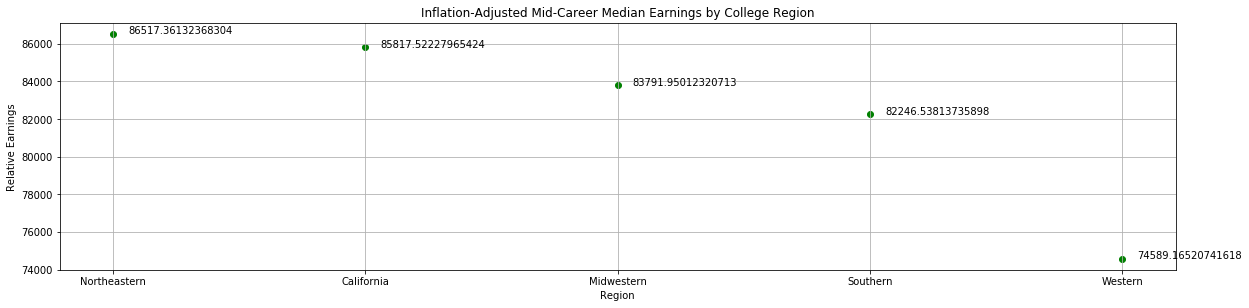

In [208]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 5)]
xticks_region_list = regions
y = region_sort['midmed_adj']
plt.xticks(range(len(x)), xticks_region_list)
plt.scatter(x,y, color='g')
plt.autoscale(tight=False)
plt.title('Inflation-Adjusted Mid-Career Median Earnings by College Region')
plt.xlabel('Region')
plt.ylabel('Relative Earnings')
plt.grid(True)


for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.06, y[i] + 0.03))

plt.show()

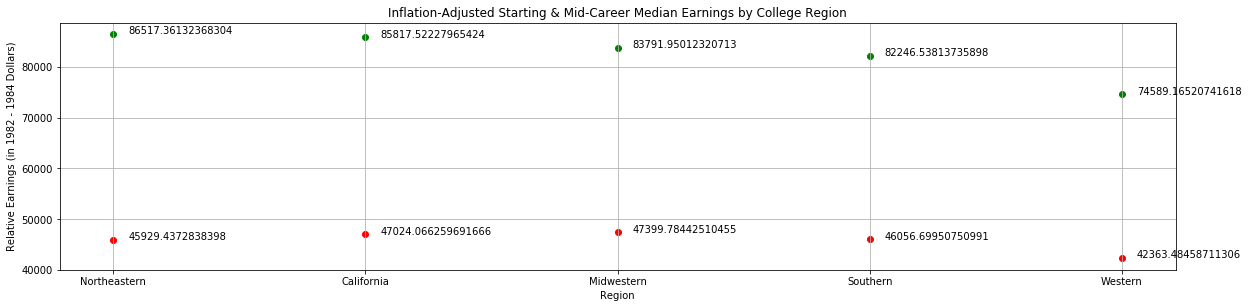

In [223]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 5)]
xticks_region_list = regions
y = region_sort['midmed_adj']
a = region_sort['start_adj']
plt.xticks(range(len(x)), xticks_region_list)
plt.scatter(x,y, color='g')
plt.autoscale(tight=False)
plt.title('Inflation-Adjusted Starting & Mid-Career Median Earnings by College Region')
plt.xlabel('Region')
plt.ylabel('Relative Earnings (in 1982 - 1984 Dollars)')
plt.grid(True)

plt.scatter(x,a, color='r')


for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.06, y[i] + 0.03))
    
for k,l in enumerate( a ):
    ax1.annotate( l, ( x[k] + 0.06, a[k] + 0.03))


plt.show()